In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from google.colab import auth
import gspread
import pandas as pd
from google.auth import default
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1AE_hudEYSjJiTAqLxFRJuUws2LV9lhQce3qq_7rOPcA/edit?gid=0#gid=0'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Keyword,gardner white,gardner white furniture,bedroom sets,gardener white,furniture at gardner white,lease to own furniture,online furniture stores,garden white,garner white,gardner & white,gardner-white,gardner-white furniture,gardnerwhite,furniture sales,garder white,same day delivery furniture near me,gardener white furniture
0,January 2023,90500.0,18100.0,201000.0,90500.0,18100.0,22200.0,27100.0,90500.0,90500.0,90500.0,90500.0,18100.0,90500.0,27100.0,90500.0,720.0,18100.0
1,February 2023,90500.0,18100.0,165000.0,90500.0,18100.0,18100.0,27100.0,90500.0,90500.0,90500.0,90500.0,18100.0,90500.0,27100.0,90500.0,1000.0,18100.0
2,March 2023,90500.0,18100.0,165000.0,90500.0,18100.0,22200.0,27100.0,90500.0,90500.0,90500.0,90500.0,18100.0,90500.0,18100.0,90500.0,880.0,18100.0
3,April 2023,90500.0,18100.0,135000.0,90500.0,18100.0,18100.0,22200.0,90500.0,90500.0,90500.0,90500.0,18100.0,90500.0,14800.0,90500.0,390.0,18100.0
4,May 2023,74000.0,14800.0,135000.0,74000.0,14800.0,18100.0,22200.0,74000.0,74000.0,74000.0,74000.0,14800.0,74000.0,22200.0,74000.0,390.0,14800.0


In [ ]:
df.set_index('Keyword', inplace=True)

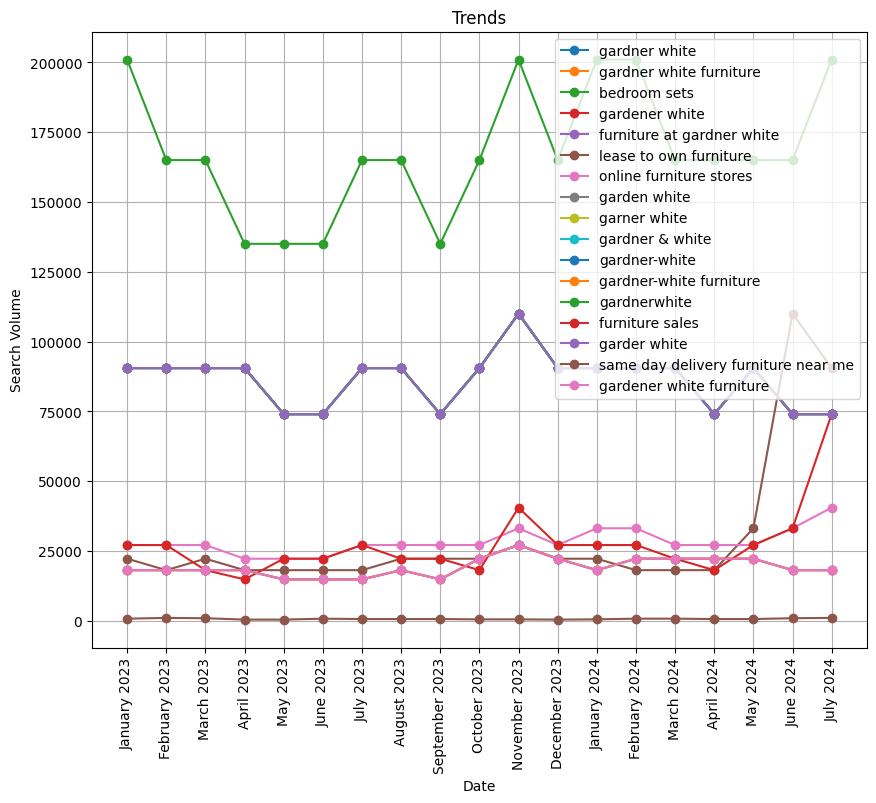

In [ ]:
df_volume=df.drop(index=['Search Volume','CPC', 'Traffic','Traffic (%)', 'Traffic Cost', 'Traffic Cost (%)', 'Competition', 'Number of Results'])
#df_volume.drop(columns={'bedroom sets'}, inplace=True)
plt.figure(figsize=(10,8))
for x in df_volume.columns:
  plt.plot(df_volume.index, df_volume[x], label=x, marker='o')

plt.xlabel('Date')
plt.legend(fontsize='small')
plt.ylabel('Search Volume')
plt.title('Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()



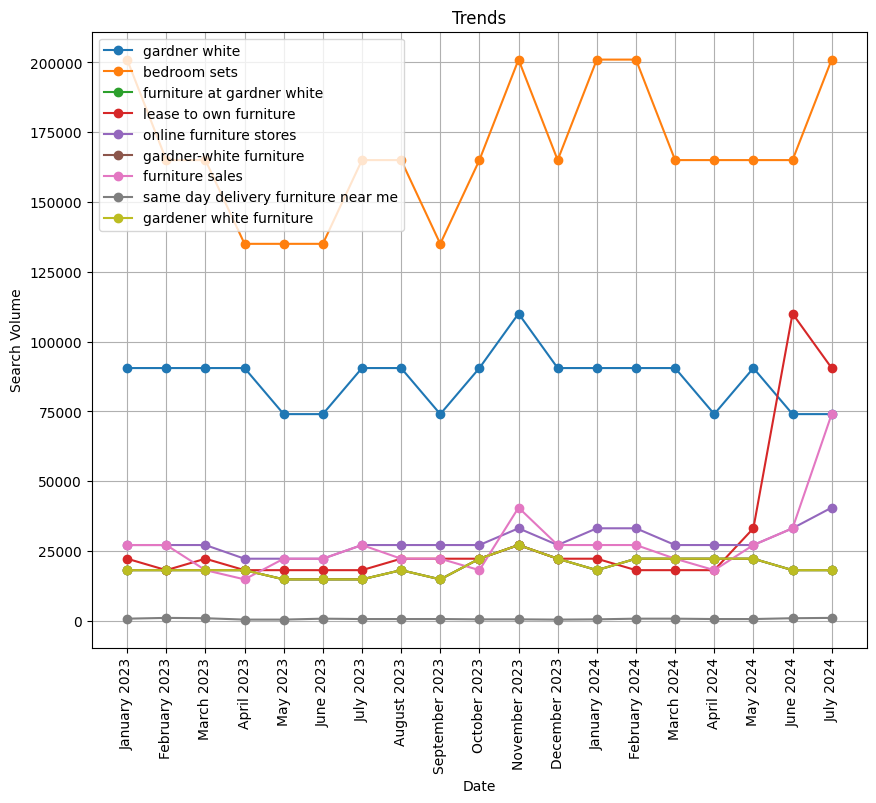

In [ ]:
df_ccf_keywords=df_volume.drop(['gardner white furniture', 'gardener white', 'garden white', 'garner white', 'gardner & white', 'gardner-white', 'gardnerwhite','garder white'], axis=1)

plt.figure(figsize=(10,8))
for x in df_ccf_keywords.columns:
  plt.plot(df_ccf_keywords.index, df_ccf_keywords[x], label=x, marker='o')

plt.xlabel('Date')
plt.legend(fontsize='small')random
plt.ylabel('Search Volume')
plt.title('Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ccf=[]
for x in df_ccf_keywords.columns:
  ccf.append(sm.tsa.stattools.ccf( df_ccf_keywords[x],df_volume['gardner white']))
ccf=pd.DataFrame(ccf, index=df_ccf_keywords.columns)
ccf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
gardner white,1.000000,0.165379,-0.185541,0.210086,0.057786,-0.635763,-0.360139,-0.150224,-0.461596,0.129614,0.463918,0.094815,0.080093,0.573295,0.189039,-0.387345,-0.322321,-0.582418,-0.582418
bedroom sets,0.452237,-0.009700,0.035807,0.186048,0.007295,-0.308456,-0.069548,-0.070213,-0.025250,0.015241,0.023775,0.262334,0.308605,-0.207977,-0.426192,0.113901,0.172391,0.289371,0.640311
furniture at gardner white,0.609582,0.226812,-0.067142,0.264237,0.253217,-0.314085,-0.292518,-0.081798,-0.075968,0.043890,0.003064,-0.203150,0.022993,0.417393,0.303514,0.132697,0.039821,-0.145930,-0.145930
lease to own furniture,-0.383323,-0.162227,-0.263617,-0.203391,0.084935,0.101616,0.221898,0.823351,0.691396,-0.253295,-0.113215,0.285519,-0.585608,-1.339478,-0.425238,0.600520,0.869135,1.271532,1.096251
online furniture stores,0.068080,-0.080447,-0.021935,-0.050617,-0.036468,-0.165810,0.052635,0.302453,0.440337,-0.078124,-0.135357,0.394761,0.126972,-0.822359,-0.701095,0.369222,0.532523,0.859126,1.232867
gardner-white furniture,0.609582,0.226812,-0.067142,0.264237,0.253217,-0.314085,-0.292518,-0.081798,-0.075968,0.043890,0.003064,-0.203150,0.022993,0.417393,0.303514,0.132697,0.039821,-0.145930,-0.145930
furniture sales,-0.094652,-0.254800,-0.116864,-0.303273,0.130757,-0.080590,-0.001890,0.287853,0.835614,0.140807,-0.307942,0.333519,0.079105,-1.011229,-1.046719,0.388475,0.627015,0.942880,1.675519
same day delivery furniture near me,-0.248975,-0.251562,-0.149628,-0.046683,0.223982,0.094116,0.151581,0.540603,0.441905,-0.387380,-0.377641,0.189771,-0.083297,-0.668639,-0.396853,0.289668,0.427161,0.702149,0.843571
gardener white furniture,0.609582,0.226812,-0.067142,0.264237,0.253217,-0.314085,-0.292518,-0.081798,-0.075968,0.043890,0.003064,-0.203150,0.022993,0.417393,0.303514,0.132697,0.039821,-0.145930,-0.145930


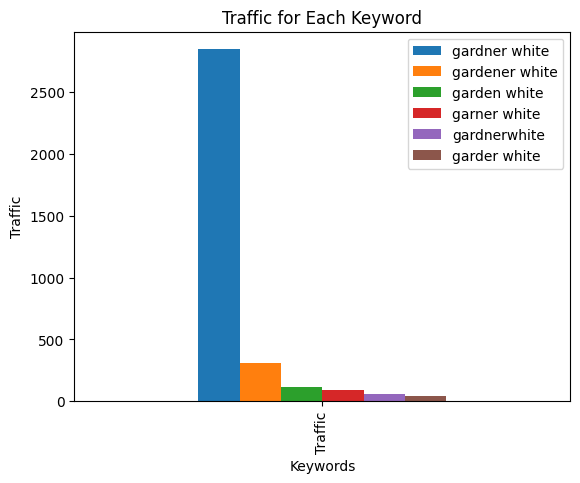

In [ ]:
df_gw=df[['gardner white', 'gardener white', 'garden white', 'garner white', 'gardnerwhite', 'garder white']]

df_gw_rest=df_gw[-8:]

row_to_plot=df_gw_rest.loc[['Traffic']]
row_to_plot.plot(kind='bar')
#plt.xticks(rotation='vertical')
plt.title('Traffic for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Traffic')
plt.show()


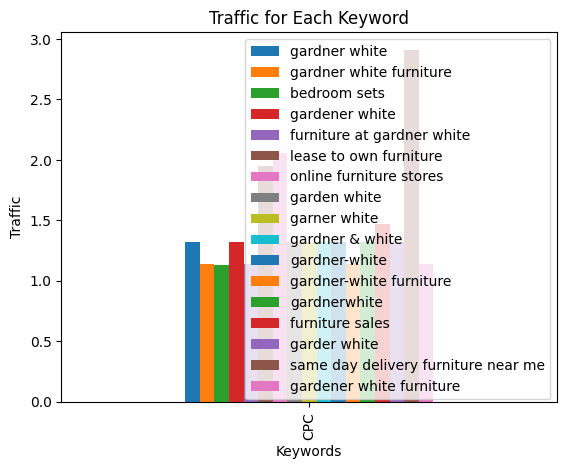

In [ ]:


df_remaining=df[-8:]

row_to_plot=df_remaining.loc[['CPC']]
row_to_plot.plot(kind='bar')
#plt.xticks(rotation='vertical')
plt.title('Traffic for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Traffic')
plt.show()


In [ ]:
df_corr=df_remaining.T
corr_matrix=np.zeros((8,8))
p_matrix=np.zeros((8,8))
for i in range(8):
  for j in range(8):
    corr, p_val=pearsonr(df_corr.iloc[:,i], df_corr.iloc[:,j])
    corr_matrix[i,j]=corr
    corr_matrix[j,i]=corr
    p_matrix[i,j]=p_val
    p_matrix[j,i]=p_val
df_pearson_corr=pd.DataFrame(corr_matrix, columns=df_corr.columns, index=df_corr.columns)
df_pearson_p=pd.DataFrame(p_matrix,columns=df_corr.columns, index=df_corr.columns)

print(df_pearson_p)
df_pearson_corr

Keyword            Search Volume       CPC        Traffic   Traffic (%)  \
Keyword                                                                   
Search Volume           0.000000  0.503464   8.245989e-04  8.248893e-04   
CPC                     0.503464  0.000000   5.650487e-01  5.647006e-01   
Traffic                 0.000825  0.565049  1.454414e-116  2.406207e-55   
Traffic (%)             0.000825  0.564701   2.406207e-55  0.000000e+00   
Traffic Cost            0.001379  0.693634   1.008316e-18  1.021014e-18   
Traffic Cost (%)        0.001381  0.693503   1.020968e-18  1.033776e-18   
Competition             0.714049  0.272766   8.357451e-01  8.355447e-01   
Number of Results       0.736815  0.099413   6.800636e-01  6.797387e-01   

Keyword            Traffic Cost  Traffic Cost (%)  Competition  \
Keyword                                                          
Search Volume      1.379173e-03      1.380681e-03     0.714049   
CPC                6.936337e-01      6.935031e-01  

Keyword,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results
Keyword,,,,,,,,
Search Volume,1.000000,-0.174295,0.732554,0.732540,0.710887,0.710839,0.095976,0.088059
CPC,-0.174295,1.000000,-0.150189,-0.150322,-0.103143,-0.103189,-0.282028,0.413011
Traffic,0.732554,-0.150189,1.000000,1.000000,0.997532,0.997528,0.054393,-0.107945
Traffic (%),0.732540,-0.150322,1.000000,1.000000,0.997528,0.997524,0.054460,-0.108060
Traffic Cost,0.710887,-0.103143,0.997532,0.997528,1.000000,1.000000,0.016875,-0.084949
Traffic Cost (%),0.710839,-0.103189,0.997528,0.997524,1.000000,1.000000,0.016845,-0.084898
Competition,0.095976,-0.282028,0.054393,0.054460,0.016875,0.016845,1.000000,0.158381
Number of Results,0.088059,0.413011,-0.107945,-0.108060,-0.084949,-0.084898,0.158381,1.000000


In [ ]:
#linear regresion
df_transposed=df.T

X=df_transposed[['CPC','Competition', 'Search Volume','Number of Results']]
y=df_transposed['Traffic']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Traffic   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     3.998
Date:                Wed, 09 Oct 2024   Prob (F-statistic):             0.0275
Time:                        16:44:33   Log-Likelihood:                -127.20
No. Observations:                  17   AIC:                             264.4
Df Residuals:                      12   BIC:                             268.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -164.7640   1050.32

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
